In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from torch_dreams.dreamer import dreamer
import torchvision.models as models
import torch

In [3]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model)

dreamer init on:  cuda


In [20]:
def make_custom_func(layer_number, channel_number): 
    def custom_func(layer_outputs):
        loss = layer_outputs[0][channel_number].mean()
        return loss
    return custom_func

[Link to `model.Mixed_6c.branch7x7_1.conv` in openAI microscope](https://microscope.openai.com/models/inceptionv3_slim/InceptionV3_InceptionV3_Mixed_6c_Branch_1_Conv2d_0a_1x1_Relu_0/148)

In [65]:
layers_to_use = [model.Mixed_6c.branch7x7_1.conv]

config = {
    "image_path": "images/noise.jpg",
    "layers": layers_to_use,
    "octave_scale": 1.1,  ## 1.1
    "num_octaves": 20,  ## 14
    "iterations": 100,   ## 100
    "lr": 0.02, ## 0.05
    "custom_func": make_custom_func(layer_number = 0, channel_number = 115),
    "max_rotation": 0.7,
    "gradient_smoothing_coeff": None,
    "gradient_smoothing_kernel_size": None
}

100%|██████████| 21/21 [00:59<00:00,  2.85s/it]


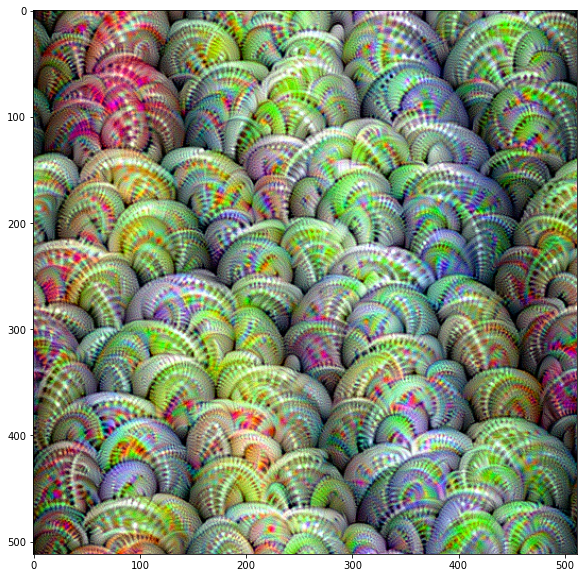

In [55]:
out = dreamy_boi.deep_dream(config)

plt.imshow(out)
plt.show()


In [56]:
out_p = cv2.cvtColor((out*255), cv2.COLOR_BGR2RGB)
cv2.imwrite("out.jpg", out_p)

True

In [ ]:
!wget -O sample_from_openAI.jpg https://openai-encyclopedia-public.storage.googleapis.com/production/2020-06-19/inceptionv3_slim/lucid.feature_vis/feature_vis/alpha%3DFalse%26negative%3DFalse%26objective%3Dchannel%26op%3DInceptionV3%252FInceptionV3%252FMixed_6c%252FBranch_1%252FConv2d_0a_1x1%252FRelu%253A0%26steps%3D1024/channel-115.png

In [60]:
their_sample = cv2.cvtColor(cv2.imread("sample_from_openAI.jpg"), cv2.COLOR_BGR2RGB)
my_sample = cv2.cvtColor(cv2.imread("out.jpg"), cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'torch_dreams')

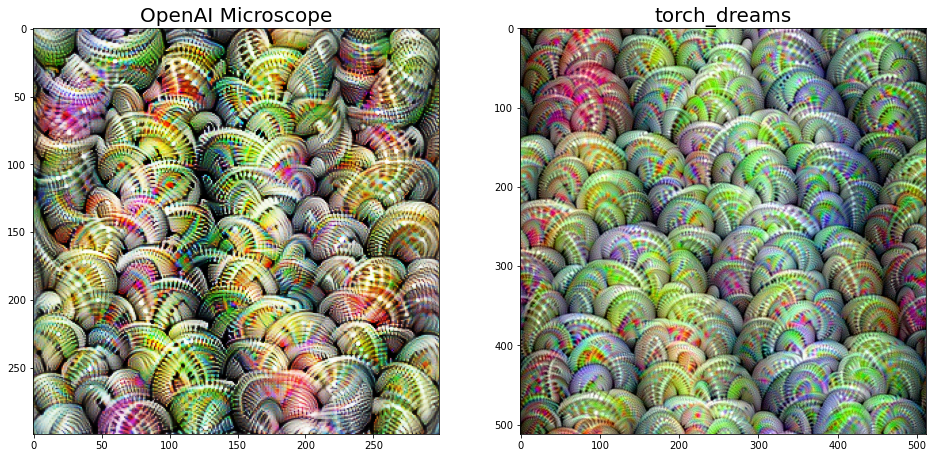

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,10))

ax.flat[0].imshow(their_sample)
ax.flat[1].imshow(my_sample)

ax.flat[0].set_title("OpenAI Microscope", fontsize = 20)
ax.flat[1].set_title("torch_dreams", fontsize = 20)
